In [52]:
import numpy as np
import matplotlib.pyplot as plt

[ 4.7569473   5.05161824  4.2790278  ...,  4.90494986  5.60152625
  4.7878466 ]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   3.33333333e-03
   1.74333333e-01   6.94222222e-01   2.33888889e-01   5.22222222e-03
   1.11111111e-04   0.00000000e+00]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   3.33333333e-03
   1.74333333e-01   6.94222222e-01   2.33888889e-01   5.22222222e-03
   1.11111111e-04   0.00000000e+00]


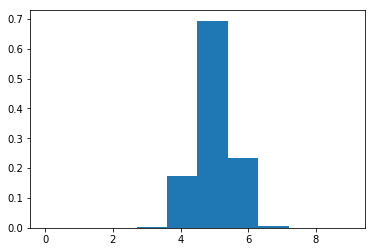

In [72]:
loc        = 5
scale      = 0.5
size       = 10000
range_from = 0
range_to   = 9
bins       = 10

x = np.random.normal(loc, scale, size)
a = plt.hist(x, normed=True, range=(range_from, range_to), bins=bins)
b = np.histogram(x, normed=True, range=(range_from, range_to), bins=bins)
print(x)
print(a[0])
print(b[0])
plt.show()

[ 0.15649921  0.17453576  0.18679199]
[  0.   0.  15.]


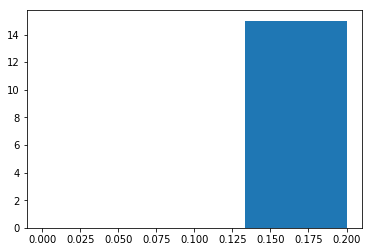

In [59]:
x = np.random.uniform(0.1, 0.2, 3)
a = plt.hist(x, normed=True, range=(0.0, 0.2), bins=3)
print(x)
print(a[0])
plt.show()